# Wind Power Assessor   
Kenneth Fries 
11/20/18

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec


### Make certain the notebook starts in the right directory.

In [2]:
%ls


 Volume in drive C is OS
 Volume Serial Number is 7A16-A3CE

 Directory of C:\Users\Ken's Computer\Documents\GitHub Repo\Kenneth_Fries\Wind Data

02/22/2019  05:14 PM    <DIR>          .
02/22/2019  05:14 PM    <DIR>          ..
02/22/2019  10:34 AM    <DIR>          .ipynb_checkpoints
02/22/2019  10:34 AM    <DIR>          Alameda Point Wind
11/10/2018  02:44 PM        11,368,237 bca0e273120f5564029bab5a2edf005e.zip
11/10/2018  02:41 PM        11,327,982 bfc157f1b9f31e50f7d044e3715a4f42.zip
02/22/2019  10:34 AM    <DIR>          Dixon Wind Data
02/22/2019  10:34 AM    <DIR>          Farrellon Islands Wind
02/22/2019  05:14 PM           436,163 Wind Power Assessor.ipynb
02/22/2019  04:03 PM         1,667,405 Wind Prospector.pdf
               4 File(s)     24,799,787 bytes
               6 Dir(s)  561,949,339,648 bytes free


In [3]:
#%cd "Wind Data"
%cd "Dixon Wind Data"
%ls


C:\Users\Ken's Computer\Documents\GitHub Repo\Kenneth_Fries\Wind Data\Dixon Wind Data
 Volume in drive C is OS
 Volume Serial Number is 7A16-A3CE

 Directory of C:\Users\Ken's Computer\Documents\GitHub Repo\Kenneth_Fries\Wind Data\Dixon Wind Data

02/22/2019  10:34 AM    <DIR>          .
02/22/2019  10:34 AM    <DIR>          ..
11/11/2018  08:08 AM         7,067,841 64409-2007.csv
11/11/2018  08:08 AM         7,069,950 64409-2008.csv
11/11/2018  08:07 AM         7,055,712 64409-2009.csv
11/11/2018  08:07 AM         7,043,791 64409-2010.csv
11/11/2018  08:07 AM         7,055,756 64409-2011.csv
11/11/2018  08:06 AM         7,059,413 64409-2012.csv
               6 File(s)     42,352,463 bytes
               2 Dir(s)  561,949,339,648 bytes free


### To change between folders with different datasets, uncomment the appropriate folder below.

In [4]:
%cd ..
#%cd "Farrellon Islands Wind"
%cd "Alameda Point Wind"
#%cd "Dixon Wind Data"
%ls

%pwd


C:\Users\Ken's Computer\Documents\GitHub Repo\Kenneth_Fries\Wind Data
C:\Users\Ken's Computer\Documents\GitHub Repo\Kenneth_Fries\Wind Data\Alameda Point Wind
 Volume in drive C is OS
 Volume Serial Number is 7A16-A3CE

 Directory of C:\Users\Ken's Computer\Documents\GitHub Repo\Kenneth_Fries\Wind Data\Alameda Point Wind

02/22/2019  10:34 AM    <DIR>          .
02/22/2019  10:34 AM    <DIR>          ..
11/10/2018  01:53 PM         6,995,070 58908-2007.csv
11/10/2018  01:53 PM         6,974,330 58908-2008.csv
11/10/2018  01:52 PM         6,960,549 58908-2009.csv
11/10/2018  01:52 PM         6,956,352 58908-2010.csv
11/10/2018  01:52 PM         6,961,794 58908-2011.csv
11/10/2018  01:51 PM         6,961,098 58908-2012.csv
               6 File(s)     41,809,193 bytes
               2 Dir(s)  561,949,339,648 bytes free


"C:\\Users\\Ken's Computer\\Documents\\GitHub Repo\\Kenneth_Fries\\Wind Data\\Alameda Point Wind"

### Enter the site number to access the data files names.

In [5]:
#Farrellon Islands Data site 59378     
#Alameda Point Data site 58908
#Dixon Data site 64409

site = 58908

### This creates and reads in the filenames the 6 years of data that multiple datasets seemed to provide.

In [6]:



data2007 = pd.read_csv(str(site) + "-2007.csv", header=[3,3]) 
data2008 = pd.read_csv(str(site) + "-2008.csv", header=[3,3]) 
data2009 = pd.read_csv(str(site) + "-2009.csv", header=[3,3])  
data2010 = pd.read_csv(str(site) + "-2010.csv", header=[3,3]) 
data2011 = pd.read_csv(str(site) + "-2011.csv", header=[3,3]) 
data2012 = pd.read_csv(str(site) + "-2012.csv", header=[3,3]) 


### We have a little cleanup to do.

In [7]:
data2007.head()


,Year,Month,Day,Hour,Minute,power (MW),wind direction at 100m (deg),wind speed at 100m (m/s),air temperature at 2m (K),surface air pressure (Pa),density at hub height (kg/m^3)
,Year,Month,Day,Hour,Minute,power (MW),wind direction at 100m (deg),wind speed at 100m (m/s),air temperature at 2m (K),surface air pressure (Pa),density at hub height (kg/m^3)
0,2007,1,1,0,0,0.002,7.660,2.069,282.526,102663.656,1.253
1,2007,1,1,0,5,0.004,7.150,2.111,282.520,102659.992,1.253
2,2007,1,1,0,10,0.006,7.062,2.176,282.517,102659.080,1.253
3,2007,1,1,0,15,0.009,6.793,2.230,282.511,102655.416,1.253
4,2007,1,1,0,20,0.010,6.265,2.255,282.511,102652.664,1.253


### Create better column headings similar across all the individual files.

In [8]:
data2007.columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_MW', 'Wind_Direction', 'Wind_Speed_m/s', 'Air_Temp_K', 'Surface_Pressure_Pa', 'Density_At_Hub_Height_kg/m^3']
data2008.columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_MW', 'Wind_Direction', 'Wind_Speed_m/s', 'Air_Temp_K', 'Surface_Pressure_Pa', 'Density_At_Hub_Height_kg/m^3']
data2009.columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_MW', 'Wind_Direction', 'Wind_Speed_m/s', 'Air_Temp_K', 'Surface_Pressure_Pa', 'Density_At_Hub_Height_kg/m^3']
data2010.columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_MW', 'Wind_Direction', 'Wind_Speed_m/s', 'Air_Temp_K', 'Surface_Pressure_Pa', 'Density_At_Hub_Height_kg/m^3']
data2011.columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_MW', 'Wind_Direction', 'Wind_Speed_m/s', 'Air_Temp_K', 'Surface_Pressure_Pa', 'Density_At_Hub_Height_kg/m^3']
data2012.columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Power_MW', 'Wind_Direction', 'Wind_Speed_m/s', 'Air_Temp_K', 'Surface_Pressure_Pa', 'Density_At_Hub_Height_kg/m^3']


### Check for data types.

In [9]:
data2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 11 columns):
Year                            105120 non-null int64
Month                           105120 non-null int64
Day                             105120 non-null int64
Hour                            105120 non-null int64
Minute                          105120 non-null int64
Power_MW                        105120 non-null float64
Wind_Direction                  105120 non-null float64
Wind_Speed_m/s                  105120 non-null float64
Air_Temp_K                      105120 non-null float64
Surface_Pressure_Pa             105120 non-null float64
Density_At_Hub_Height_kg/m^3    105120 non-null float64
dtypes: float64(6), int64(5)
memory usage: 8.8 MB


### Time to create a single file out of the many.

In [10]:
db = pd.DataFrame()
frames = [data2007, data2008, data2009, data2010, data2011, data2012]
data = pd.concat(frames, ignore_index=True)


### Use a seperate cell for inspection, so it can be run multiple times. All the data is being shown to view the indicies at the top and bottom, and to look at the headers.

In [11]:
data

,Year,Month,Day,Hour,Minute,Power_MW,Wind_Direction,Wind_Speed_m/s,Air_Temp_K,Surface_Pressure_Pa,Density_At_Hub_Height_kg/m^3
0,2007,1,1,0,0,0.002,7.660,2.069,282.526,102663.656,1.253
1,2007,1,1,0,5,0.004,7.150,2.111,282.520,102659.992,1.253
2,2007,1,1,0,10,0.006,7.062,2.176,282.517,102659.080,1.253
3,2007,1,1,0,15,0.009,6.793,2.230,282.511,102655.416,1.253
4,2007,1,1,0,20,0.010,6.265,2.255,282.511,102652.664,1.253
5,2007,1,1,0,25,0.011,5.903,2.276,282.511,102651.752,1.252
6,2007,1,1,0,30,0.012,5.655,2.307,282.511,102650.832,1.252
7,2007,1,1,0,35,0.013,5.436,2.331,282.514,102651.752,1.252
8,2007,1,1,0,40,0.014,5.710,2.349,282.514,102649.008,1.252
9,2007,1,1,0,45,0.014,5.688,2.349,282.511,102647.168,1.252


## I don't like the Power_MW column.  I don't think it tells you much if you don't know what machine you are referencing.  So I'll add a column for power of the wind.  The actual power will depend on the Coefficient of Performance, and since this is different at different windspeeds for each turbine, we won't add that functionality in just yet.  The power extracted from the wind will be less than the betz limit of 59.3%

In [12]:
area = 1 # meter^2

data["Power_Density_W/m^2"] = 0.5 * area * data['Density_At_Hub_Height_kg/m^3'] * data['Wind_Speed_m/s']**3
data["Energy_Density_W-hr/m^2"] = data["Power_Density_W/m^2"] *5 / 60
data.head()

,Year,Month,Day,Hour,Minute,Power_MW,Wind_Direction,Wind_Speed_m/s,Air_Temp_K,Surface_Pressure_Pa,Density_At_Hub_Height_kg/m^3,Power_Density_W/m^2,Energy_Density_W-hr/m^2
0,2007,1,1,0,0,0.002,7.660,2.069,282.526,102663.656,1.253,5.548844,0.462404
1,2007,1,1,0,5,0.004,7.150,2.111,282.520,102659.992,1.253,5.893669,0.491139
2,2007,1,1,0,10,0.006,7.062,2.176,282.517,102659.080,1.253,6.455022,0.537919
3,2007,1,1,0,15,0.009,6.793,2.230,282.511,102655.416,1.253,6.947614,0.578968
4,2007,1,1,0,20,0.010,6.265,2.255,282.511,102652.664,1.253,7.183907,0.598659


### Checking that the indexes are ordered properly after the concat function.

In [13]:
data.index.get_values()


array([     0,      1,      2, ..., 630717, 630718, 630719], dtype=int64)

### This is a good way to get the list of headers. 

In [14]:
columns = data.columns.tolist()
columns

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Power_MW',
 'Wind_Direction',
 'Wind_Speed_m/s',
 'Air_Temp_K',
 'Surface_Pressure_Pa',
 'Density_At_Hub_Height_kg/m^3',
 'Power_Density_W/m^2',
 'Energy_Density_W-hr/m^2']

### Having a quick look at the wind direction frequency. 

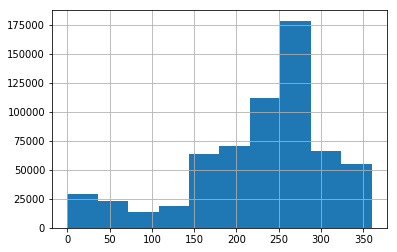

In [15]:
data.Wind_Direction.hist()

### The data needs to be binned for a polar chart.  
We are using 16 directions.  So that will display the 4 cardinal directions.  Also the 4 direction between like Northwest, Southeast.  Then also the 8 directions between like NNW, WNW, etc.  

In [16]:
 grouped = pd.cut(data.Wind_Direction, bins=16)

In [17]:
grouped.tolist()

[Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(-0.36, 22.5, closed='right'),
 Interval(337.497, 359.997, closed='right'),
 Interval(337.497, 359.997, closed='right'),
 Interval(337.497, 359.997, closed='right'),
 Interval(337.497, 359.997, closed='right'),
 Interval(337.497, 359.997, closed='right'),
 Interval(337.497, 359.997, closed='right'),
 Interval(337.497, 359.997, closed='right'),
 Interval(337.497, 359.997, closed='right'),


### We now get the total times the wind was from each direction.  And also the total amount of power from each direction.
Speed is aggregated in each directional bin to gather understanding of how much wind is attributable to that direction over the time period.  Power is taken directly from the power column, and since there is an extra time component (5 minutes per reading) we are really talking about energy.  I don't know what swept area the power was calculated for, however we are just looking atdirection comparrisons, not absolute amount of energy.  Quick and dirty.  We can calulate the energy.      The equation for wind power(P) is given by:  

P= 0.5 * ρ * A * V^3  

where, ρ=  Air  density  in  kg/m3,   A  = Rotor swept area (m2), V = wind Speed in m/s

The thing to note here is that the power is proportional to velocity cubed.

In [ ]:
s = data.groupby(pd.cut(data['Wind_Direction'], bins=16))['Wind_Speed_m/s'].count()
p = data.groupby(pd.cut(data['Wind_Direction'], bins=16))['Power_Density_W/m^2'].sum()
e = data.groupby(pd.cut(data['Wind_Direction'], bins=16))['Energy_Density_W-hr/m^2'].sum()

In [18]:
print ("Speed",s)
print ("Power Density", p)
print ("Energy Density",e)

Speed Wind_Direction
(-0.36, 22.5]          20601
(22.5, 45.0]           14253
(45.0, 67.499]         14477
(67.499, 89.999]       11493
(89.999, 112.499]       6104
(112.499, 134.999]      9166
(134.999, 157.499]     32777
(157.499, 179.998]     39441
(179.998, 202.498]     41948
(202.498, 224.998]     50453
(224.998, 247.498]     68839
(247.498, 269.998]    132114
(269.998, 292.498]     76764
(292.498, 314.997]     42380
(314.997, 337.497]     35250
(337.497, 359.997]     34660
Name: Wind_Speed_m/s, dtype: int64
Power Density Wind_Direction
(-0.36, 22.5]         3.912805e+06
(22.5, 45.0]          1.375336e+06
(45.0, 67.499]        9.874141e+05
(67.499, 89.999]      3.369543e+05
(89.999, 112.499]     7.723992e+04
(112.499, 134.999]    3.565073e+05
(134.999, 157.499]    8.155645e+06
(157.499, 179.998]    7.611310e+06
(179.998, 202.498]    4.659917e+06
(202.498, 224.998]    3.167537e+06
(224.998, 247.498]    3.289333e+06
(247.498, 269.998]    1.756486e+07
(269.998, 292.498]    1.702893e

### Now I manipulate the data to access values for axis size, and such.  Also to know what the graph inputs actually are, and what values I have access to.

In [19]:
print(s.values.tolist())

[20601, 14253, 14477, 11493, 6104, 9166, 32777, 39441, 41948, 50453, 68839, 132114, 76764, 42380, 35250, 34660]


In [20]:
1.02*max(s.values.tolist())

134756.28

In [21]:
data.Month.unique().tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Finally we make the graph here.

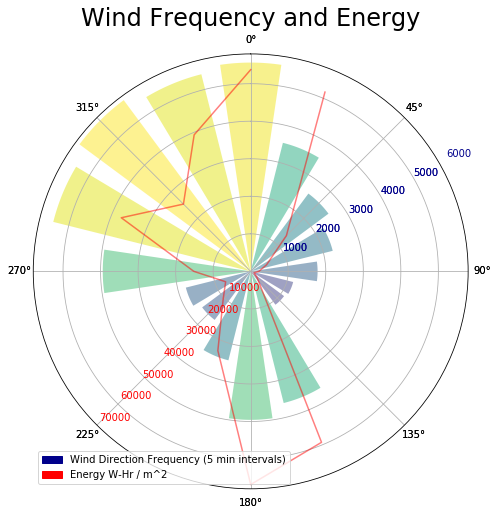

In [27]:
# Compute pie angular locations, and angular widths.
N = 16
theta = [22.5/360*(2 * np.pi), 45/360*(2 * np.pi), 67.5/360*(2 * np.pi), 90/360*(2 * np.pi), 112.5/360*(2 * np.pi), 135/360*(2 * np.pi), 157.5/360*(2 * np.pi), 180/360*(2 * np.pi), 202.5/360*(2 * np.pi), 225/360*(2 * np.pi), 247.5/360*(2 * np.pi), 270/360*(2 * np.pi), 292.5/360*(2 * np.pi), 315/360*(2 * np.pi), 337.5/360*(2 * np.pi), 360/360*(2 * np.pi)]             #np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = 2*np.pi / 16-np.pi/32

fig = plt.figure(figsize=(10,8))


#Design the graph.  Set 0 degree location to north.  And reverse the theta direction for normal.
ax = plt.subplot(111, projection='polar', label = "Wind Speed")
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

#plot the data to the graph
bars = ax.bar(theta, s.values.tolist(), width=width, bottom=0.0)
for r, bar in zip(s.values.tolist(), bars):
    bar.set_facecolor(plt.cm.viridis(r / s.values.max()))
    bar.set_alpha(0.5)

    
    
ax2 = ax.figure.add_axes(ax.get_position(), projection='polar', 
                             label='twin', frameon=False,
                             theta_direction=ax.get_theta_direction(),
                             theta_offset=ax.get_theta_offset())


for label in ax.get_yticklabels():
    ax.figure.texts.append(label)   

ax2.plot(theta, e.values.tolist(), color='red', alpha=0.5)
plt.setp(ax2.get_yticklabels(), color='red')

plt.setp(ax.get_yticklabels(), color='darkblue')
#plt.setp(ax2.axis(grid=None))   

#We set axis limits explicitly and automatically.  1.02 makes it just beyond the data max.
ax.set_rlim([0, (1.02*max(s.values.tolist()))])
ax2.set_rlim([0, (1.02*max(e.values.tolist()))])

#Only one grid per graph.
ax2.grid(False)

#Reposition Axis if blocking graph.
ax.set_rlabel_position(60)
ax2.set_rlabel_position(225)

red_patch = mpatches.Patch(color='red', label='Energy W-Hr / m^2')
blue_patch = mpatches.Patch(color='darkblue', label='Wind Direction Frequency (5 min intervals)')
plt.legend(handles=[blue_patch,red_patch])
plt.title('Wind Frequency and Energy', fontsize=24)

plt.show()

In [23]:
pm = data.groupby('Month')['Energy_Density_W-hr/m^2'].sum()
pm

Month
1     715100.085163
2     747506.446818
3     882828.504322
4     999429.701915
5     819826.331903
6     580959.541554
7     260132.348905
8     225250.107348
9     233992.329194
10    433762.694835
11    481186.582852
12    783562.451850
Name: Energy_Density_W-hr/m^2, dtype: float64

<Figure size 864x864 with 0 Axes>

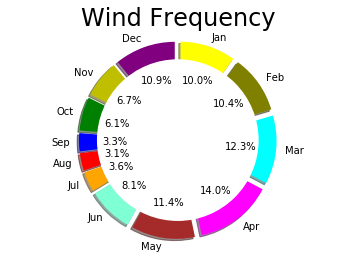

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
sizes = pm    #Power Grouped by Month
colors = {1:'yellow', 2:'olive', 3:'cyan', 4:'magenta', 5:'brown', 6:'aquamarine',7:'orange',   8: 'r', 9: 'b', 10: 'g',11: 'y', 12: 'purple',}


f = plt.figure(figsize=(12,12))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False, explode = explode, colors=[colors[i] for i in data.Month.unique().tolist()])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
centre_circle = plt.Circle((0,0),0.9,fc='white')
f = plt.gcf()
f.gca().add_artist(centre_circle)

plt.title('Wind Frequency', fontsize=24)

plt.show()

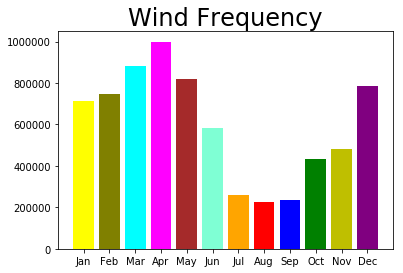

In [43]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
sizes = pm    #Power Grouped by Month
colors = {1:'yellow', 2:'olive', 3:'cyan', 4:'magenta', 5:'brown', 6:'aquamarine',7:'orange',   8: 'r', 9: 'b', 10: 'g',11: 'y', 12: 'purple',}


#f = plt.figure(figsize=(12,6))
#gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2], height_ratios=[1])

#plt.subplot(121)

# equivalent but more general

# add a subplot with no frame
   #fig1, ax1 = plt.subplots()


#ax2 = plt.subplot(gs[1])

#ax2.bar(sizes)
fig,ax2 = plt.subplots()
ax2.bar(labels, sizes, width=0.8, color=[colors[i] for i in data.Month.unique().tolist()])

plt.title('Wind Frequency', fontsize=24)


plt.show()

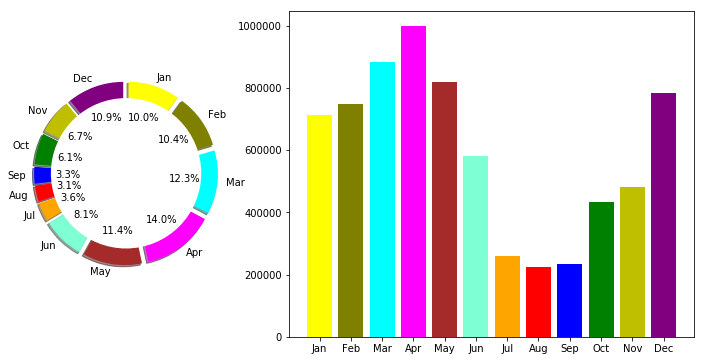

In [33]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
sizes = pm    #Power Grouped by Month
colors = {1:'yellow', 2:'olive', 3:'cyan', 4:'magenta', 5:'brown', 6:'aquamarine',7:'orange',   8: 'r', 9: 'b', 10: 'g',11: 'y', 12: 'purple',}


f = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2], height_ratios=[1])

#plt.subplot(121)

# equivalent but more general
ax1 = plt.subplot(gs[0])

#ax1=plt.subplot(121)

# add a subplot with no frame
   #fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False, explode = explode, colors=[colors[i] for i in data.Month.unique().tolist()])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
centre_circle = plt.Circle((0,0),0.9,fc='white')
f = plt.gcf()
f.gca().add_artist(centre_circle)


ax2 = plt.subplot(gs[1])

   # ax2.bar(sizes)
   #fig,ax2 = plt.subplots()
ax2.bar(labels, sizes, width=0.8, color=[colors[i] for i in data.Month.unique().tolist()])
   #ax.set_xticks(survived_df.index+0.4)  # set the x ticks to be at the middle of each bar since the width of each bar is 0.8
   #ax.set_xticklabels(survived_df.Groups)  #replace the name of the x ticks with your Groups name




plt.show()

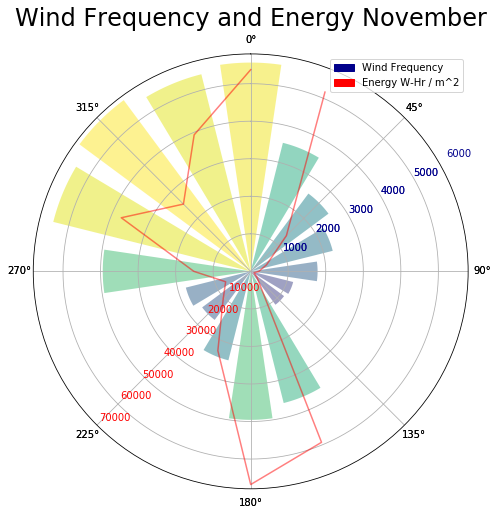

In [44]:
M = 11
month = {1:'January',2:'Febuary',3:'March',4:'April', 5:'May', 6:'June', 7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

s = data[data['Month']==M].groupby(pd.cut(data[data['Month']==M]['Wind_Direction'], bins=16))['Wind_Speed_m/s'].count()
p = data[data['Month']==M].groupby(pd.cut(data[data['Month']==M]['Wind_Direction'], bins=16))['Power_Density_W/m^2'].sum()
e = data[data['Month']==M].groupby(pd.cut(data[data['Month']==M]['Wind_Direction'], bins=16))['Energy_Density_W-hr/m^2'].sum()



# Compute pie angular locations, and angular widths.
N = 16
theta = [22.5/360*(2 * np.pi), 45/360*(2 * np.pi), 67.5/360*(2 * np.pi), 90/360*(2 * np.pi), 112.5/360*(2 * np.pi), 135/360*(2 * np.pi), 157.5/360*(2 * np.pi), 180/360*(2 * np.pi), 202.5/360*(2 * np.pi), 225/360*(2 * np.pi), 247.5/360*(2 * np.pi), 270/360*(2 * np.pi), 292.5/360*(2 * np.pi), 315/360*(2 * np.pi), 337.5/360*(2 * np.pi), 360/360*(2 * np.pi)]             #np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = 2*np.pi / 16-np.pi/32

fig = plt.figure(figsize=(10,8))


#Design the graph.  Set 0 degree location to north.  And reverse the theta direction for normal.
ax = plt.subplot(111, projection='polar', label = "Wind Speed")
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

#plot the data to the graph
bars = ax.bar(theta, s.values.tolist(), width=width, bottom=0.0)
for r, bar in zip(s.values.tolist(), bars):
    bar.set_facecolor(plt.cm.viridis(r / s.values.max()))
    bar.set_alpha(0.5)

    
    
ax2 = ax.figure.add_axes(ax.get_position(), projection='polar', 
                             label='twin', frameon=False,
                             theta_direction=ax.get_theta_direction(),
                             theta_offset=ax.get_theta_offset())


for label in ax.get_yticklabels():
    ax.figure.texts.append(label)   

ax2.plot(theta, e.values.tolist(), color='red', alpha=0.5)
plt.setp(ax2.get_yticklabels(), color='red')

plt.setp(ax.get_yticklabels(), color='darkblue')
#plt.setp(ax2.axis(grid=None))   

#We set axis limits explicitly and automatically.  1.02 makes it just beyond the data max.
ax.set_rlim([0, (1.02*max(s.values.tolist()))])
ax2.set_rlim([0, (1.02*max(e.values.tolist()))])

#Only one grid per graph.
ax2.grid(False)

#Reposition Axis if blocking graph.
ax.set_rlabel_position(60)
ax2.set_rlabel_position(225)

red_patch = mpatches.Patch(color='red', label='Energy W-Hr / m^2')
blue_patch = mpatches.Patch(color='darkblue', label='Wind Frequency')
plt.legend(handles=[blue_patch,red_patch])
plt.title('Wind Frequency and Energy ' + str(month[M]), fontsize=24)

plt.show()


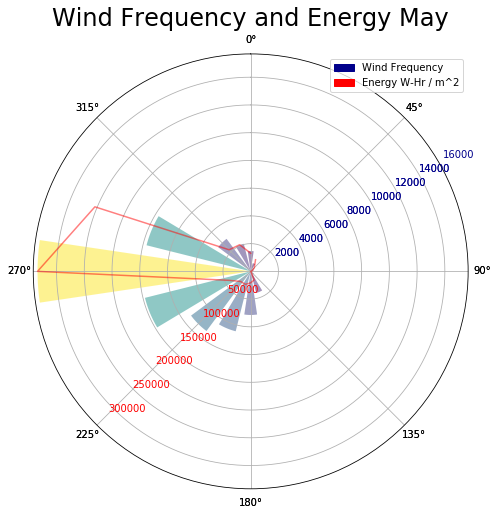

In [45]:
M = 5
month = {1:'January',2:'Febuary',3:'March',4:'April', 5:'May', 6:'June', 7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

s = data[data['Month']==M].groupby(pd.cut(data[data['Month']==M]['Wind_Direction'], bins=16))['Wind_Speed_m/s'].count()
p = data[data['Month']==M].groupby(pd.cut(data[data['Month']==M]['Wind_Direction'], bins=16))['Power_Density_W/m^2'].sum()
e = data[data['Month']==M].groupby(pd.cut(data[data['Month']==M]['Wind_Direction'], bins=16))['Energy_Density_W-hr/m^2'].sum()



# Compute pie angular locations, and angular widths.
N = 16
theta = [22.5/360*(2 * np.pi), 45/360*(2 * np.pi), 67.5/360*(2 * np.pi), 90/360*(2 * np.pi), 112.5/360*(2 * np.pi), 135/360*(2 * np.pi), 157.5/360*(2 * np.pi), 180/360*(2 * np.pi), 202.5/360*(2 * np.pi), 225/360*(2 * np.pi), 247.5/360*(2 * np.pi), 270/360*(2 * np.pi), 292.5/360*(2 * np.pi), 315/360*(2 * np.pi), 337.5/360*(2 * np.pi), 360/360*(2 * np.pi)]             #np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = 2*np.pi / 16-np.pi/32

fig = plt.figure(figsize=(10,8))


#Design the graph.  Set 0 degree location to north.  And reverse the theta direction for normal.
ax = plt.subplot(111, projection='polar', label = "Wind Speed")
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

#plot the data to the graph
bars = ax.bar(theta, s.values.tolist(), width=width, bottom=0.0)
for r, bar in zip(s.values.tolist(), bars):
    bar.set_facecolor(plt.cm.viridis(r / s.values.max()))
    bar.set_alpha(0.5)

    
    
ax2 = ax.figure.add_axes(ax.get_position(), projection='polar', 
                             label='twin', frameon=False,
                             theta_direction=ax.get_theta_direction(),
                             theta_offset=ax.get_theta_offset())


for label in ax.get_yticklabels():
    ax.figure.texts.append(label)   

ax2.plot(theta, e.values.tolist(), color='red', alpha=0.5)
plt.setp(ax2.get_yticklabels(), color='red')

plt.setp(ax.get_yticklabels(), color='darkblue')
#plt.setp(ax2.axis(grid=None))   

#We set axis limits explicitly and automatically.  1.02 makes it just beyond the data max.
ax.set_rlim([0, (1.02*max(s.values.tolist()))])
ax2.set_rlim([0, (1.02*max(e.values.tolist()))])

#Only one grid per graph.
ax2.grid(False)

#Reposition Axis if blocking graph.
ax.set_rlabel_position(60)
ax2.set_rlabel_position(225)

red_patch = mpatches.Patch(color='red', label='Energy W-Hr / m^2')
blue_patch = mpatches.Patch(color='darkblue', label='Wind Frequency')
plt.legend(handles=[blue_patch,red_patch])
plt.title('Wind Frequency and Energy ' + str(month[M]), fontsize=24)

plt.show()
